In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from numba import jit
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
data = pd.read_excel("Final_Data.xlsx")

In [4]:
df = data.copy()

In [5]:
df.shape

(356245, 15)

In [6]:
df.drop(["model","description","lat","long","posting_date"],axis=1,inplace = True)

In [7]:
df.head()

,region,price,year,manufacturer,fuel,odometer,title_status,transmission,type,state
0,auburn,33590,2014.0,gmc,gas,57923.0,clean,other,pickup,al
1,auburn,22590,2010.0,chevrolet,gas,71229.0,clean,other,pickup,al
2,auburn,39590,2020.0,chevrolet,gas,19160.0,clean,other,pickup,al
3,auburn,30990,2017.0,toyota,gas,41124.0,clean,other,pickup,al
4,auburn,15000,2013.0,ford,gas,128000.0,clean,automatic,truck,al


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356245 entries, 0 to 356244
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        356245 non-null  object 
 1   price         356245 non-null  int64  
 2   year          356245 non-null  float64
 3   manufacturer  356245 non-null  object 
 4   fuel          356245 non-null  object 
 5   odometer      356245 non-null  float64
 6   title_status  356245 non-null  object 
 7   transmission  356245 non-null  object 
 8   type          356245 non-null  object 
 9   state         356245 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 27.2+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder

region_encoder = LabelEncoder()
df['region'] = region_encoder.fit_transform(df['region'])

manufacturer_encoder = LabelEncoder()
df["manufacturer"] = manufacturer_encoder.fit_transform(df["manufacturer"])

fuel_encoder = LabelEncoder()
df["fuel"] = fuel_encoder.fit_transform(df["fuel"])

title_encoder = LabelEncoder()
df["title_status"] = title_encoder.fit_transform(df["title_status"])

transmission_encoder = LabelEncoder()
df["transmission"] = transmission_encoder.fit_transform(df["transmission"])

type_encoder = LabelEncoder()
df["type"] = type_encoder.fit_transform(df["type"])

state_encoder = LabelEncoder()
df["state"] = state_encoder.fit_transform(df["state"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356245 entries, 0 to 356244
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        356245 non-null  int32  
 1   price         356245 non-null  int64  
 2   year          356245 non-null  float64
 3   manufacturer  356245 non-null  int32  
 4   fuel          356245 non-null  int32  
 5   odometer      356245 non-null  float64
 6   title_status  356245 non-null  int32  
 7   transmission  356245 non-null  int32  
 8   type          356245 non-null  int32  
 9   state         356245 non-null  int32  
dtypes: float64(2), int32(7), int64(1)
memory usage: 17.7 MB


In [11]:
X = df.drop(columns = ['price'])
y = df['price']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

r2_lin = r2_score(y_test, y_pred)
rmse_lin = mean_squared_error(y_test, y_pred, squared=False)

print('The r2 is: ', r2_lin)
print('The rmse is: ', rmse_lin)


The r2 is:  0.4098971484028765
The rmse is:  9556.570116556226


In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)

In [16]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print('The r2 is: ', r2_rf)
print('The rmse is: ', rmse_rf)

The r2 is:  0.8535796871401043
The rmse is:  4760.349717075387


In [17]:
from xgboost import XGBRegressor as xgb
clf = xgb(n_jobs=-1)
clf.fit(X_train, y_train)
y_pred_xgb = clf.predict(X_test)

In [18]:
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)

print('The r2 is: ', r2_xgb)
print('The rmse is: ', rmse_xgb)

The r2 is:  0.7766197259016908
The rmse is:  5879.773596227718


In [19]:
from lightgbm import LGBMRegressor
model2 = LGBMRegressor(n_jobs=-1)
model2.fit(X_train, y_train)
y_pred_lgm = model2.predict(X_test)

In [20]:
r2_gbm = r2_score(y_test, y_pred_lgm)
rmse_gbm = mean_squared_error(y_test, y_pred_lgm, squared=False)

print('The r2 is: ', r2_gbm)
print('The rmse is: ', rmse_gbm)

The r2 is:  0.746814158395652
The rmse is:  6259.763159695008


In [21]:
X_train = pd.DataFrame(X_train)

In [22]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
year,0.457
odometer,0.185
manufacturer,0.091
type,0.089
fuel,0.066
region,0.044
state,0.041
transmission,0.018
title_status,0.009


<AxesSubplot:xlabel='feature'>

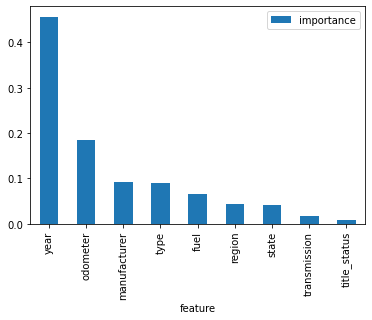

In [23]:
importances.plot.bar()

In [29]:
from tabulate import tabulate

In [25]:
data = [["Linear Regression", r2_lin, rmse_lin], 
        ["Random Forest", r2_rf, rmse_rf], 
        ["XGBoost", r2_xgb, rmse_xgb], 
        ["LightGBM", r2_gbm, rmse_gbm]]
col_names = ["Model,""R2 Score", "RMSE"]
print(tabulate(data, headers=col_names))

                     Model,R2 Score     RMSE
-----------------  ----------------  -------
Linear Regression          0.409897  9556.57
Random Forest              0.85358   4760.35
XGBoost                    0.77662   5879.77
LightGBM                   0.746814  6259.76


In [26]:
regr.coef_

array([ -159.90281851,  3190.65425575,  -562.92266378, -2050.87999688,
       -5419.04754889, -1087.5872503 ,  1871.77125387,   129.15265373,
         106.80012253])

In [27]:
X= df['year'].array
Y = df['price'].array

In [28]:
from scipy import stats
result = stats.pearsonr(df['year'],df['price'])
result

(0.4240995144995042, 0.0)

In [29]:
#Since P value is very less, null hypothesis can be rejected.

In [30]:
import statsmodels.api as sm
import numpy as np

X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

In [31]:
results.params

const   -1.215534e+06
x1       6.133708e+02
dtype: float64

In [32]:
results.bse

const    4413.835749
x1          2.194452
dtype: float64

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                 7.813e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:18:31   Log-Likelihood:            -3.8283e+06
No. Observations:              356245   AIC:                         7.657e+06
Df Residuals:                  356243   BIC:                         7.657e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.216e+06   4413.836   -275.392      0.000   -1.22e+06   -1.21e+06
x1           613.3708      2.194    279.510      0.000     609.070     617.672
==============================================================================
Omnibus:                    55789.412   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93957.475
Skew:                           1.046   Prob(JB):                         0.00
Kurtosis:                       4.398   Cond. No.                     4.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model = RandomForestRegressor(n_jobs=-1)

In [19]:
params =      {'max_depth': [20, 40, 60, 70, 80, 90, 100, None],
               'n_estimators': [100,200, 400, 600, 800, 1000]}

In [20]:
random_forest_random_search = RandomizedSearchCV(model, params, scoring = 'neg_mean_squared_error', cv = 2, verbose=2, random_state=42, n_jobs = -1)

In [51]:
random_forest_random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [20, 40, 60, 70, 80, 90,
                                                      100, None],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
random_forest_random_search.best_params_

{'n_estimators': 600, 'max_depth': 80}

In [21]:
model = RandomForestRegressor(n_estimators= 600,max_depth= 80, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, n_estimators=600, n_jobs=-1)

In [22]:
y_pred = model.predict(X_test)

In [23]:
mape = np.round(mean_absolute_percentage_error(y_test, y_pred),4)

In [24]:
mse = np.round(mean_squared_error(y_test, y_pred, squared=False),2)

In [25]:
r2 = np.round(r2_score(y_test, y_pred),4)

In [31]:
data = [["MAPE", mape], 
        ["RMSE", mse], 
        ["R2", r2]]
col_names = ["Metrics","Random Forest Model"]
print(tabulate(data, headers=col_names))

Metrics      Random Forest Model
---------  ---------------------
MAPE                      0.4309
RMSE                   4734.55
R2                        0.8552


In [62]:
params =      {'max_depth': [ 80],
               'max_features' : ["auto", "sqrt", "log2"],
               "bootstrap": [True, False],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [600]}

In [63]:
random_forest_random_search = RandomizedSearchCV(model, params, cv = 2, verbose=2, random_state=42, n_jobs = -1)

In [64]:
random_forest_random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


C:\Users\sasid\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.81118045 0.81734926 0.81818899 0.80481037 0.80217297 0.80628377
 0.78631222 0.80339846        nan 0.71403687]
  warnings.warn(


RandomizedSearchCV(cv=2,
                   estimator=RandomForestRegressor(max_depth=80,
                                                   n_estimators=600,
                                                   n_jobs=-1),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [80],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [600]},
                   random_state=42, verbose=2)

In [65]:
random_forest_random_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': False}

In [74]:
model = RandomForestRegressor(n_estimators= 600,max_depth= 80, min_samples_split = 2, min_samples_leaf = 2, max_features= 'log2',bootstrap = False, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=80, max_features='log2',
                      min_samples_leaf=2, n_estimators=600, n_jobs=-1)

In [75]:
y_pred = model.predict(X_test)

In [76]:
mean_absolute_percentage_error(y_test, y_pred)

0.4457512720895175

In [77]:
mean_squared_error(y_test, y_pred, squared=False)

4792.408798589904

In [78]:
r2_score(y_test, y_pred)

0.8516008799155654

In [66]:
X_train.shape

(249371, 9)

In [118]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Activation, Dense
from keras import optimizers

In [119]:
def build_and_compile_model(norm):
    
    model = keras.Sequential([norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)])

    model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(0.001),metrics=tf.keras.metrics.RootMeanSquaredError())
    return model


In [120]:
X_train_normalized = layers.Normalization(input_shape=[9,], axis=None)
X_train_normalized.adapt(X_train)

In [121]:
model = build_and_compile_model(X_train_normalized)

In [122]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 9)                3         
 ion)                                                            
                                                                 
 dense_33 (Dense)            (None, 64)                640       
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dense_35 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,868
Trainable params: 4,865
Non-trainable params: 3
_________________________________________________________________


In [123]:
DNN_model = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
6235/6235 [==============================] - 35s 6ms/step - loss: 7464.8809 - root_mean_squared_error: 10762.6641 - val_loss: 6069.3667 - val_root_mean_squared_error: 8402.3594
Epoch 2/100
6235/6235 [==============================] - 21s 3ms/step - loss: 5999.1416 - root_mean_squared_error: 8295.5508 - val_loss: 5989.4233 - val_root_mean_squared_error: 8303.0176
Epoch 3/100
6235/6235 [==============================] - 15s 2ms/step - loss: 5952.4243 - root_mean_squared_error: 8243.7021 - val_loss: 5963.8447 - val_root_mean_squared_error: 8254.7080
Epoch 4/100
6235/6235 [==============================] - 15s 2ms/step - loss: 5929.3979 - root_mean_squared_error: 8223.7871 - val_loss: 5950.4976 - val_root_mean_squared_error: 8253.2305
Epoch 5/100
6235/6235 [==============================] - 16s 3ms/step - loss: 5913.8447 - root_mean_squared_error: 8212.2656 - val_loss: 5935.7031 - val_root_mean_squared_error: 8228.9199
Epoch 6/100
6235/6235 [==============================] - 17

6235/6235 [==============================] - 15s 2ms/step - loss: 4865.1396 - root_mean_squared_error: 7182.5288 - val_loss: 4936.5005 - val_root_mean_squared_error: 7256.5098
Epoch 88/100
6235/6235 [==============================] - 14s 2ms/step - loss: 4861.5415 - root_mean_squared_error: 7180.0610 - val_loss: 4933.6055 - val_root_mean_squared_error: 7320.5220
Epoch 89/100
6235/6235 [==============================] - 15s 2ms/step - loss: 4858.1851 - root_mean_squared_error: 7178.7671 - val_loss: 4935.1045 - val_root_mean_squared_error: 7326.8354
Epoch 90/100
6235/6235 [==============================] - 14s 2ms/step - loss: 4854.5864 - root_mean_squared_error: 7174.3145 - val_loss: 4917.1592 - val_root_mean_squared_error: 7282.6074
Epoch 91/100
6235/6235 [==============================] - 14s 2ms/step - loss: 4851.9800 - root_mean_squared_error: 7174.9189 - val_loss: 4919.8906 - val_root_mean_squared_error: 7266.4688
Epoch 92/100
6235/6235 [==============================] - 14s 2ms/st

In [124]:
results = model.evaluate(X_test, y_test)

3340/3340 [==============================] - 6s 2ms/step - loss: 4881.1465 - root_mean_squared_error: 7179.4316


In [125]:
print('loss: ', results[0])
print('accuracy: ', results[1])   

loss:  4881.146484375
accuracy:  7179.431640625


In [126]:
X_test_normalized = layers.Normalization(input_shape=[9,], axis=None)
X_test_normalized.adapt(X_test)

In [127]:
y_pred = model.predict(X_test)

In [132]:
mean_absolute_percentage_error(y_test, y_pred)

0.6562324165104982